```{image} lungmap-logo.png
:width: 200px
:class: analytics-logo
```

# LungMAP User Analytics - September vs August 2023

This section displays metrics collected from Google Analytics for the LungMAP Data Browser at https://data-browser.lungmap.net and compares September 2023 with the previous month (August 2023). The generation of this report is now coded in Jupyter notebooks and can be rerun easily and modified or consolidated as desired.

## Key to tables

On the tables:

* Diffs, e.g. <span style="color: green">(+19.04%)</span> or <span style="color: red">(-12.03%)</span>, compare the later month with the previous month.
* "+" Indicates the entry is new in the report in the current month.
* "↑" Indicates the entry has moved up in rank since the last month.
* "↓" Indicates the entry has moved down in rank since the last month.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes

# Analytics package:
# !pip install -e "git+https://github.com/DataBiosphere/data-browser.git@5042e623bfe6ad8404be5f60e1ddb3c0e8e7d6b3#egg=analytics&subdirectory=analytics/hdgar-book/analytics_package"

In [1]:
from IPython.display import display

%load_ext autoreload
%autoreload 2

import analytics.charts as ac
import analytics_lungmap as lm

GA_PROPERTY = "362871218" # data-browser.lungmap.net - GA4
ANALYTICS_START = "2021-05-01"
TODAY = 'today'
PERIOD = "2023-09"
PREV_PERIOD = "2023-08"
SECRET_NAME = 'ANALYTICS_REPORTING_CLIENT_SECRET_PATH'

GA3_END = "2023-06-30"
GA4_START = "2023-07-01"


In [2]:
default_params = {
    "service_system": ac.authenticate_ga4(SECRET_NAME),
    "property": GA_PROPERTY,
    "index_key_formatter": lm.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD
}

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=713613812354-ccedl8colb27q3q6rvvvjqrpb5tcbuug.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8082%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=jwvWUggxc64EU80ds7JhuawC8TzPVk&access_type=offline


In [2]:
ac.init_tables()

In [2]:
# ga3_service_system = ac.authenticate_ga(SECRET_NAME)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=713613812354-ccedl8colb27q3q6rvvvjqrpb5tcbuug.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8083%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=EE8pMxvNYtUpkRWcgeocgWDQkDPf15&access_type=offline


In [4]:
# ga3_users_over_time_params = {
#     "start_date": ANALYTICS_START,
#     "end_date": GA3_END,
#     "service_system": ga3_service_system,
#     "property": "246040541",
# }
# 
# lm.save_ga3_users_over_time_data({}, {}, **ga3_users_over_time_params)

## User acquisition
### Monthly users and pageviews (all time)

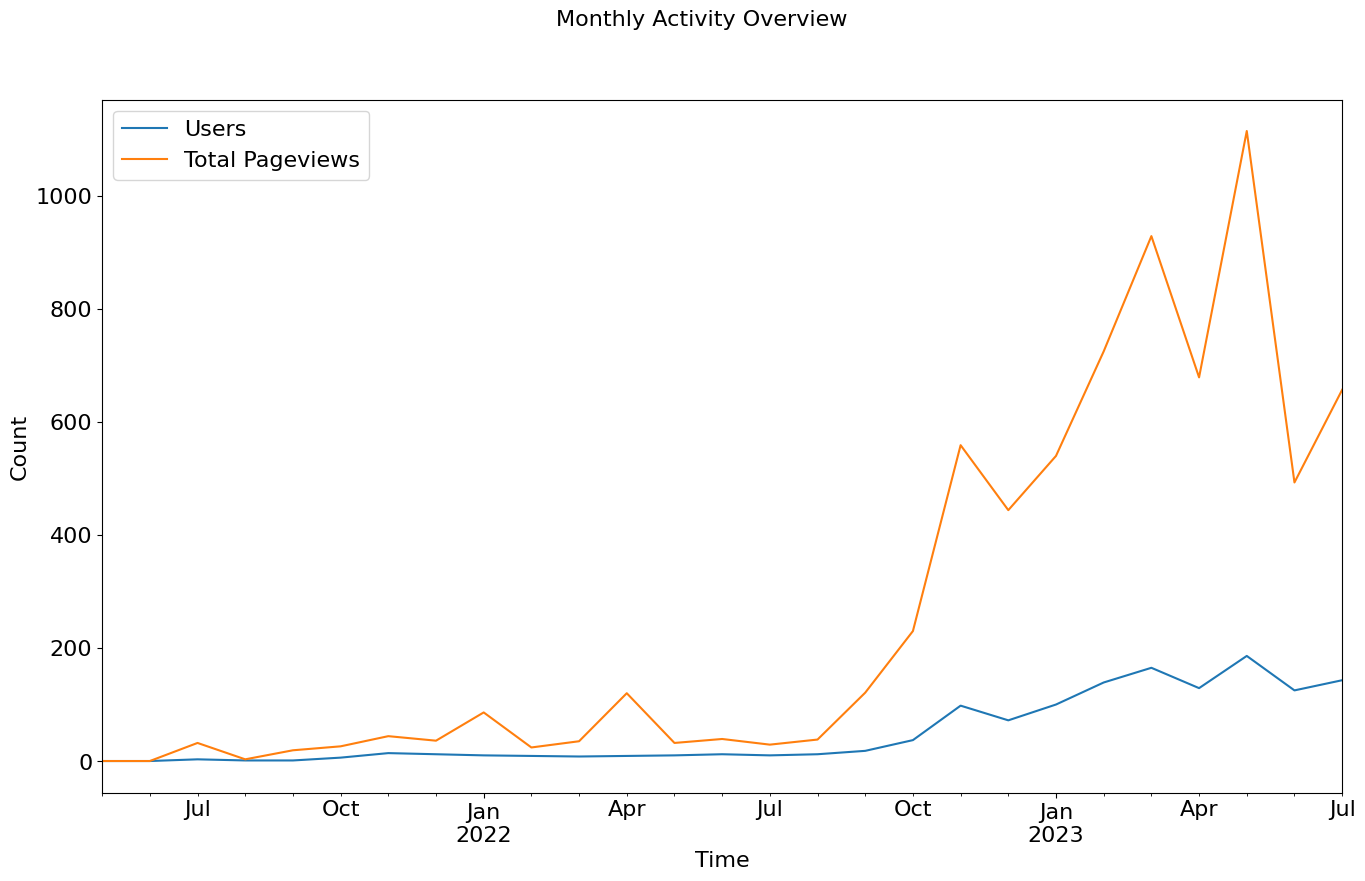

In [8]:
users_over_time_table = lm.plot_users_over_time(start_date=GA4_START, end_date=TODAY, **default_params)

<div style="page-break-after: always"></div>

### Total unique users and unique pageviews by month (all time)

In [9]:
display(users_over_time_table)

<div style="page-break-after: always"></div>

## Users and sessions
Users are distinguished based on a tracking cookie set by Google. Because cookies may not remain present over time or between devices, it's likely that total users are overcounted and returning users are undercounted.

In [24]:
ac.show_difference_table("Total Users", None, "totalUsers", None, **default_params)

In [25]:
ac.show_difference_table("Returning Users", None, "totalUsers", None, dimension_filter="newVsReturning==returning", **default_params)

In [26]:
ac.show_difference_table("Total Visits", None, "sessions", None, **default_params)

## Page views

In [54]:
ac.show_difference_table("Total", None, "screenPageViews", None, **default_params)

## Top referrers

In [58]:
ac.show_difference_table("Users", "Referrer", "totalUsers","sessionSource", **default_params)

## Social network referrers

In [33]:
ac.show_difference_table("User Sessions", "Social Network", "sessions", "sessionSource", dimension_filter="sessionDefaultChannelGroup=@Social", **default_params)

## Device category

In [45]:
ac.show_difference_table(["Users", "Percentage of users"], "Category", "totalUsers", "deviceCategory", percentage_metrics={"totalUsers"}, **default_params)

<div style="page-break-after: always"></div>

## Top pages

In [15]:
ac.show_difference_table("Page Views", "Page", "screenPageViews", "pagePath", **default_params)

<div style="page-break-after: always"></div>

## Top entrances

In [53]:
ac.show_difference_table("Entrances", "Page", "sessions", "landingPage", **default_params)

<div style="page-break-after: always"></div>

## Top countries

In [34]:
ac.show_difference_table("Users", "Country", "totalUsers", "country", **default_params)

## Downloads and exports
### Download project manifest

In [26]:
# ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Manifest", rows_type="fixed", **default_params)

### Direct file downloads (from files tab)

In [32]:
# ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==File;ga:eventAction==Download", rows_type="fixed", **default_params)

### Top "export selected data" queries

In [7]:
# ac.show_difference_table("Selected for Export Count", "Query", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~/explore/export/export-to-terra|/explore/export/get-curl-command|/explore/export/download-manifest", split_vertical=[], **default_params)

## Entities
### Entity tabs selections (project, samples, files)

In [11]:
# ac.show_difference_table("Count", "Entity Tab", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Entity;ga:eventAction==Select Tab", **default_params)

## Projects
### Top project detail pages

In [3]:
ac.show_difference_table("Count", "Project", "screenPageViews", "pagePathPlusQueryString", dimension_filter="pagePathPlusQueryString=~^(\\/explore\\/projects\\/[0-9a-fA-F]{8}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{12})(\\/?\\?{0}|\\/?\\?{1}.*)$", **default_params)

<div style="page-break-after: always"></div>

## Data Portal

### Top pages

In [23]:
ac.show_difference_table("Count", "Path", "screenPageViews", "pagePath", dimension_filter="pagePath!~^\/explore", **default_params)

### Top landing pages

In [4]:
ac.show_difference_table("Count", "Path", "sessions", "landingPage", dimension_filter="landingPage!~^\/explore", **default_params)

### Top searches

In [24]:
# ac.show_difference_table("Count", "Search Text", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Enter Text", **default_params)

### Top selected search results

In [25]:
# ac.show_difference_table("Count", "Search Result", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Click", **default_params)